<a href="https://colab.research.google.com/github/godwinnwalozie/Montessori-Grade-Analysis/blob/main/montessori_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A test dataset to analyse performance of montessori pupils

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

In [3]:
# build the dataframe
#np.random.seed(42)
df = pd.DataFrame ({'student_id' : np.arange(1,202), 'age':np.random.randint(6,10,201),'basic_science':np.random.randint(30,60,201),\
'literacy':np.random.randint(20,60,201), 'quantitative_reasoning' :np.random.randint(28,60,201), "literature" :np.random.randint(28,60,201),\
"ict" : np.random.randint(35,60,201), "ettiquette": np.random.randint(40,60,201), "history": np.random.randint(40,60,201),\
                   "music": np.random.randint(40,60,201)})

In [4]:
df.student_id= df.student_id.apply(lambda x: 'student_id'+'_'+str(x))

In [5]:
df['total_grade'] = df.apply(lambda x: x['basic_science'] +  x.literacy + x.quantitative_reasoning \
    + x.literature + x.ict + x.ettiquette + x.history + x.music, axis = 1)

In [6]:
df

,student_id,age,basic_science,literacy,quantitative_reasoning,literature,ict,ettiquette,history,music,total_grade
0,student_id_1,7,57,32,50,42,41,51,40,41,354
1,student_id_2,6,52,31,34,53,57,40,55,46,368
2,student_id_3,9,43,23,31,45,47,58,57,52,356
3,student_id_4,9,32,54,47,31,54,58,44,40,360
4,student_id_5,7,59,53,31,29,45,50,41,48,356
...,...,...,...,...,...,...,...,...,...,...,...
196,student_id_197,6,31,41,57,38,49,45,56,54,371
197,student_id_198,8,54,25,29,35,51,40,47,48,329
198,student_id_199,9,30,46,55,37,42,46,57,53,366
199,student_id_200,7,34,40,59,42,35,52,59,57,378


In [7]:
# age distributiion
df_age = df.age.value_counts()

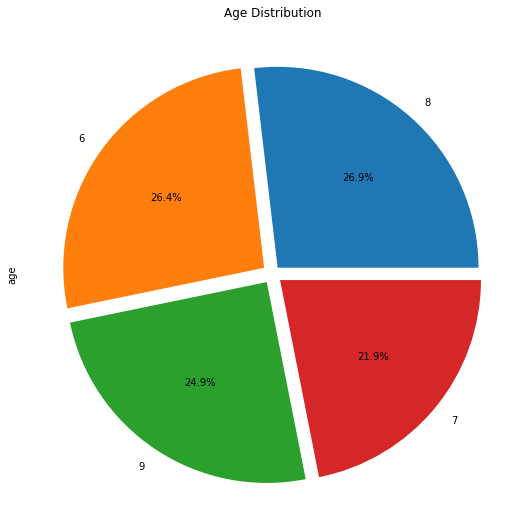

In [8]:
fig,ax = plt.subplots(figsize = (9,10))
df_age.plot(kind = 'pie', explode=[0.04, 0.05, 0.05, 0.05],autopct='%1.1f%%')
ax.set(title = 'Age Distribution');

In [9]:
df.describe()

,age,basic_science,literacy,quantitative_reasoning,literature,ict,ettiquette,history,music,total_grade
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,7.502488,44.358209,40.014925,43.800995,42.243781,46.383085,49.597015,49.810945,49.373134,365.582090
std,1.131920,8.756771,11.725390,9.260140,9.664640,6.863491,5.825958,5.665164,5.721457,22.970296
min,6.000000,30.000000,20.000000,28.000000,28.000000,35.000000,40.000000,40.000000,40.000000,305.000000
25%,6.000000,36.000000,29.000000,36.000000,33.000000,41.000000,45.000000,45.000000,44.000000,350.000000
50%,8.000000,45.000000,40.000000,44.000000,41.000000,46.000000,50.000000,50.000000,50.000000,365.000000
75%,8.000000,52.000000,51.000000,52.000000,51.000000,52.000000,55.000000,54.000000,54.000000,383.000000
max,9.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,417.000000


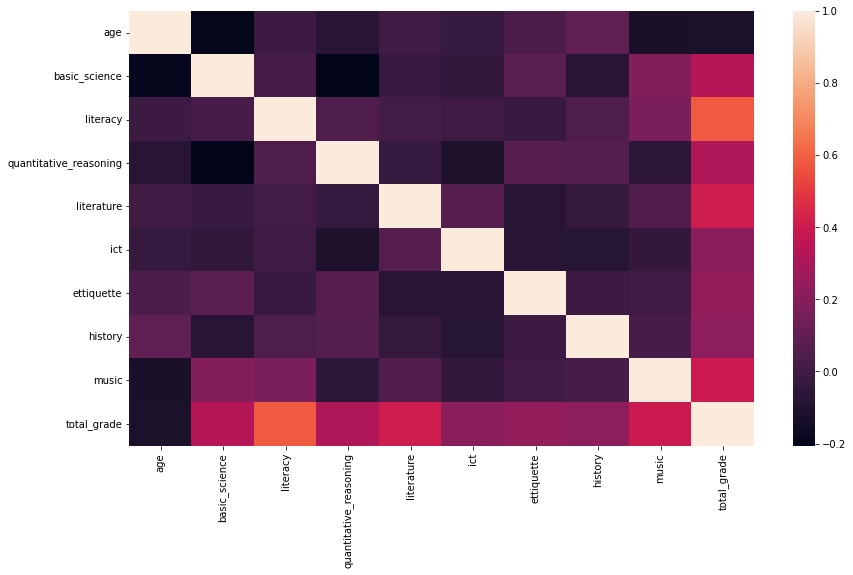

In [10]:
fig,ax = plt.subplots(figsize = (14,8))
sns.heatmap(df.corr())

In [11]:
df_grade = df.loc[:,['student_id','total_grade']]
df_grade.sort_values('total_grade', ascending = False)

,student_id,total_grade
66,student_id_67,417
176,student_id_177,411
156,student_id_157,407
89,student_id_90,407
8,student_id_9,407
...,...,...
184,student_id_185,315
190,student_id_191,312
99,student_id_100,310
91,student_id_92,306


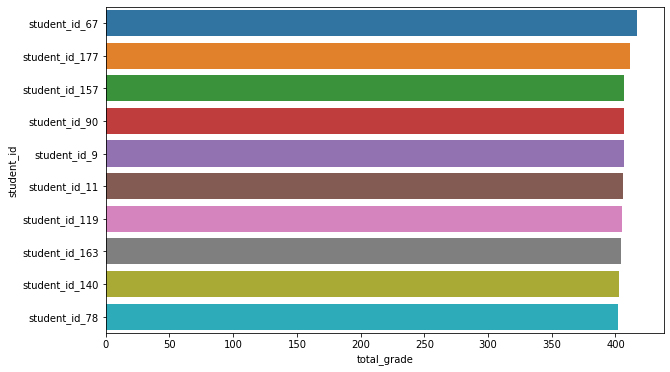

In [12]:
# top ten student
fig,ax = plt.subplots(figsize = (10,6))
sns.barplot(data = df_grade[:10], y = df_grade.sort_values('total_grade', ascending = False).student_id[:10]\
            ,  x = df_grade.sort_values('total_grade', ascending = False).total_grade[:10])

In [13]:
df.quantitative_reasoning.corr(df.basic_science)

-0.20586481844520593

In [14]:
df.corr()

,age,basic_science,literacy,quantitative_reasoning,literature,ict,ettiquette,history,music,total_grade
age,1.000000,-0.189256,-0.009233,-0.078661,-0.000284,-0.035199,0.036168,0.095200,-0.125603,-0.117842
basic_science,-0.189256,1.000000,0.020839,-0.205865,-0.023724,-0.046137,0.080367,-0.076840,0.193720,0.334785
literacy,-0.009233,0.020839,1.000000,0.041979,0.009189,-0.004607,-0.023992,0.039861,0.166717,0.583088
quantitative_reasoning,-0.078661,-0.205865,0.041979,1.000000,-0.033535,-0.111843,0.065328,0.059039,-0.060405,0.314640
literature,-0.000284,-0.023724,0.009189,-0.033535,1.000000,0.063560,-0.076302,-0.039792,0.044372,0.403750
ict,-0.035199,-0.046137,-0.004607,-0.111843,0.063560,1.000000,-0.074021,-0.079784,-0.043002,0.211351
ettiquette,0.036168,0.080367,-0.023992,0.065328,-0.076302,-0.074021,1.000000,-0.012924,0.001534,0.241330
history,0.095200,-0.076840,0.039861,0.059039,-0.039792,-0.079784,-0.012924,1.000000,0.023321,0.223434
music,-0.125603,0.193720,0.166717,-0.060405,0.044372,-0.043002,0.001534,0.023321,1.000000,0.395642
total_grade,-0.117842,0.334785,0.583088,0.314640,0.403750,0.211351,0.241330,0.223434,0.395642,1.000000


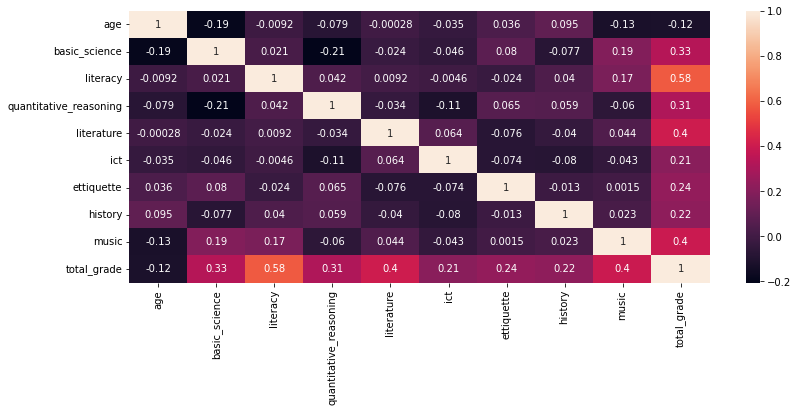

In [22]:
fig, ax = plt.subplots( figsize = (13, 5))
sns.heatmap(df.corr() ,annot = True)